# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file =  'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train_orig, y_train = train['features'], train['labels']
X_validation_orig, y_validation = valid['features'], valid['labels']
X_test_orig, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train_orig)

# TODO: Number of validation examples
n_validation = len(X_validation_orig)

# TODO: Number of testing examples.
n_test = len(X_test_orig)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train_orig[0].shape

# TODO: How many unique classes/labels there are in the dataset.
# each label value in the y_train dataset corresponds to a class. 
unique_class_values = set(y_train)
n_classes = len(unique_class_values)
print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)

print("Image data shape =", image_shape)
#print("Values of classes =", v_classes)
print("Number of classes =", n_classes)



Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?


# of the random picture chosen in the set:  1929
Class # of picture chosen:  23


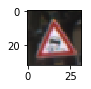

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import random
import matplotlib.pyplot as plt

index = random.randint(0, len(X_train_orig))
image = X_train_orig[index]

# Visualizations will be shown in the notebook.
%matplotlib inline

print("\n# of the random picture chosen in the set: ", index)
plt.figure(figsize=(1,1))
plt.imshow(image)
print("Class # of picture chosen: ", y_train[index])

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [5]:
import numpy as np
from sklearn.utils import shuffle

# normalize() is designed to normalize an array of pictures so instead of having an array of values between 0...255
# it is centered around 0 with values between -1 and 1
def normalize(image_array):
    normalizer = np.array([128,128,128])
    image_array = np.subtract(image_array, normalizer)
    image_array = np.divide(image_array, normalizer)
    image_array = image_array.astype(np.float32)
    return image_array

# Normalizing all our sets of image arrays (training, validation and testing sets)
X_train = normalize(X_train_orig)
X_validation =  normalize(X_validation_orig)
X_test = normalize(X_test_orig)

"""
# Checking a 'pixel' value inside an image is now a flow number
print(X_train_orig[2369][5][8][0])
print(type(X_train_orig[2369][5][8][0]))
print(X_train[2369][5][8][0])
print(type(X_train[2369][5][8][0]))
"""

# Shuffle the train data in order to avoid having the same categories in a batch 
# in case the original data was not shuffled already
X_train, y_train = shuffle(X_train, y_train)

### Model Architecture

In [6]:
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 128

In [7]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 32x32x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43 (43 traffic signs categories).
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

## Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

### Features and Labels

In [8]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

### Training Pipeline

In [9]:
# Creating two learning rates
# the smaller learning rates will be used after a certain number of epochs, to avoid divergence
rate = 0.001
rate_small = 0.0001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
optimizer_small = tf.train.AdamOptimizer(learning_rate = rate_small)
training_operation = optimizer.minimize(loss_operation)
training_operation_small = optimizer_small.minimize(loss_operation)

### Model Evaluation

In [10]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Training / Validating the Model

In [11]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        printed_count = 0
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            if i < 26:
                if printed_count < 1:
                    print("This is EPOCH", i+1)
                    printed_count = 1
                
                sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            else:
                if printed_count < 1:
                    print("Small learning rate: EPOCH", i+1)
                    printed_count = 1
                    
                sess.run(training_operation_small, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

This is EPOCH 1
EPOCH 1 ...
Validation Accuracy = 0.767

This is EPOCH 2
EPOCH 2 ...
Validation Accuracy = 0.849

This is EPOCH 3
EPOCH 3 ...
Validation Accuracy = 0.873

This is EPOCH 4
EPOCH 4 ...
Validation Accuracy = 0.892

This is EPOCH 5
EPOCH 5 ...
Validation Accuracy = 0.899

This is EPOCH 6
EPOCH 6 ...
Validation Accuracy = 0.895

This is EPOCH 7
EPOCH 7 ...
Validation Accuracy = 0.902

This is EPOCH 8
EPOCH 8 ...
Validation Accuracy = 0.917

This is EPOCH 9
EPOCH 9 ...
Validation Accuracy = 0.908

This is EPOCH 10
EPOCH 10 ...
Validation Accuracy = 0.920

This is EPOCH 11
EPOCH 11 ...
Validation Accuracy = 0.926

This is EPOCH 12
EPOCH 12 ...
Validation Accuracy = 0.917

This is EPOCH 13
EPOCH 13 ...
Validation Accuracy = 0.913

This is EPOCH 14
EPOCH 14 ...
Validation Accuracy = 0.927

This is EPOCH 15
EPOCH 15 ...
Validation Accuracy = 0.911

This is EPOCH 16
EPOCH 16 ...
Validation Accuracy = 0.925

This is EPOCH 17
EPOCH 17 ...
Validation Accuracy = 0.916

Th

### Training Accuracy

In [12]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_train, y_train)
    print("Train Accuracy = {:.3f}".format(test_accuracy))

Train Accuracy = 1.000


### Test the Model

In [13]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.931


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

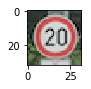

(32, 32, 3)
<class 'numpy.ndarray'>


In [14]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import matplotlib.image as mpimg
import numpy as np

pic_1 = mpimg.imread('0_speed_limit_20kmh.jpg')

%matplotlib inline
plt.figure(figsize=(1,1))
plt.imshow(pic_1)
plt.show()

print(pic_1.shape)
print(type(pic_1))

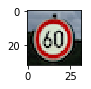

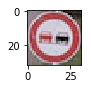

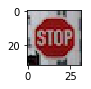

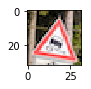

In [15]:
pic_2 = mpimg.imread('3_speed_limit_60kmh.jpg')

%matplotlib inline
plt.figure(figsize=(1,1))
plt.imshow(pic_2)
plt.show()

pic_3 = mpimg.imread('9_no_passing.jpg')
plt.figure(figsize=(1,1))
plt.imshow(pic_3)
plt.show()

pic_4 = mpimg.imread('14_stop.jpg')
plt.figure(figsize=(1,1))
plt.imshow(pic_4)
plt.show()

pic_5 = mpimg.imread('23_slippery_road.jpg')
plt.figure(figsize=(1,1))
plt.imshow(pic_5)
plt.show()

In [16]:
#creating an array with all the new pictures
new_pics = np.array([pic_1, pic_2, pic_3, pic_4, pic_5])
new_labels = np.array([0, 3, 9, 14, 23])
print("Shape of the picture array: ", new_pics.shape)
print("Type of the picture array: ", type(new_pics))
print("Shape of the label array: ", new_labels.shape)
print("Type of the label array: ", type(new_labels))

Shape of the picture array:  (5, 32, 32, 3)
Type of the picture array:  <class 'numpy.ndarray'>
Shape of the label array:  (5,)
Type of the label array:  <class 'numpy.ndarray'>


### Predict the Sign Type for Each Image

In [17]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
# Evaluate the loss and accuracy of the model for a given dataset.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(new_pics, new_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.800


### Analyze Performance

In [18]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

In [19]:
def evaluate_high_level(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
        prediction = sess.run(correct_prediction, feed_dict={x: batch_x, y: batch_y})
        print("Model accuracy:", prediction)
        soft_entropy = sess.run(cross_entropy, feed_dict={x: batch_x, y: batch_y})
        print("Loss is: ", soft_entropy)
        results = sess.run(logits, feed_dict = {x: batch_x})

    return total_accuracy / num_examples

In [20]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
# Evaluate the loss and accuracy of the model for a given dataset.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate_high_level(new_pics, new_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Model accuracy: [ True False  True  True  True]
Loss is:  [ 0.          4.31472969  0.          0.          0.        ]
Test Accuracy = 0.800


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [21]:
def evaluate_detailed(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
        prediction = sess.run(correct_prediction, feed_dict={x: batch_x, y: batch_y})

        soft_entropy = sess.run(cross_entropy, feed_dict={x: batch_x, y: batch_y})

        results = sess.run(logits, feed_dict = {x: batch_x})
        print("Logits are:", results)

        final = sess.run(tf.nn.softmax(results))
        #print("\nProbabilities are:", final)
        top_5 = sess.run(tf.nn.top_k(results, k=5))
        print("\nTop probabilities are:", top_5)
    return total_accuracy / num_examples

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [22]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
# Evaluate the loss and accuracy of the model for a given dataset.

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate_detailed(new_pics, new_labels)
print("\nList of correct labels:\n", new_labels)

Logits are: [[  4622.15576172   3460.3449707   -2460.71728516  -4919.11035156
    2338.98706055    839.38122559  -1093.58032227  -1487.4185791
    -866.9074707   -6186.24414062  -3708.20336914  -3994.56884766
   -5892.30273438  -8137.51367188  -4244.91845703  -3750.63330078
   -3660.37084961  -3773.66186523   -343.72769165  -4959.80615234
    -357.9317627   -3987.39233398  -4552.85009766  -2766.76342773
   -1788.65344238  -3976.93408203  -4432.32373047  -3710.44873047
   -3969.9074707     114.92102814  -4044.69506836  -1639.53015137
   -2442.20141602  -2831.95141602  -6039.98291016  -3660.03369141
   -5726.96777344  -1579.74328613  -2952.34936523  -3928.25854492
    -302.54882812  -4097.20898438  -2940.31542969]
 [ -4653.75341797   1575.62060547   6509.77392578   6505.47265625
   -4086.05981445   4494.14111328  -2170.08105469  -4070.64916992
    -243.37290955  -4278.91113281  -4892.00976562  -4432.57324219
   -7930.27929688  -4955.75        -4684.10205078    194.17016602
   -7328.49804

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.